## Problem 1
From the conditions given in the problem, the prediction of the pressue can be calculated as follows: 
$$
\begin{aligned}
p_{estimate} = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$

from the actual pressure given in the problem, the least square function can be written as,
$$
\begin{aligned}
\min_{A12, A21} && \sum_{k=1}^{11}(p_{estimate} - p)^2 \\
\end{aligned}
$$

A12 and A21 estimated values are: tensor([1.9103, 1.7298], requires_grad=True)
Loss is: 0.87948006


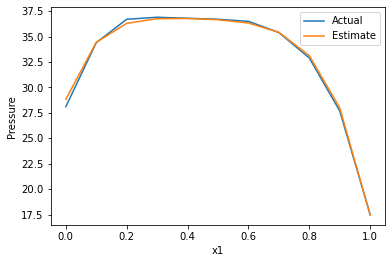

In [30]:
import matplotlib.pyplot as mplt
import numpy as np
import torch
from torch.autograd import Variable
from IPython import display

X1 = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
X2 = 1-X1 #Since, X1+X2=1
a = np.array(([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]))
T = 20
p_water = 10 ** (a[0, 0] - a[0, 1] / (T + a[0, 2]))
p_dio = 10 ** (a[1, 0] - a[1, 1] / (T + a[1, 2]))
P = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
P = torch.tensor(P, requires_grad=False, dtype=torch.float32)

A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True)

x1 = torch.tensor(X1, requires_grad=False, dtype=torch.float32)
x2 = torch.tensor(X2, requires_grad=False, dtype=torch.float32)

dx = 0.00001

for i in range(1000):
    P_est = x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p_water + \
        x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p_dio

    loss = (P_est - P) ** 2
    loss = loss.sum()

    loss.backward()

    with torch.no_grad():
        A -= dx * A.grad

        A.grad.zero_()

print('A12 and A21 estimated values are:',A)
print('Loss is:',loss.data.numpy())

P_est = P_est.detach().numpy()[0]
P = P.detach().numpy()[0]
x1 = x1.detach().numpy()[0]

mplt.plot(x1, P, label='Actual')
mplt.plot(x1, P_hat, label='Estimate')
mplt.xlabel('x1')
mplt.ylabel('Pressure')
mplt.legend()

## Problem 2
